In [15]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt  
%matplotlib inline

In [16]:
#loading the dataset 
kick10k = pd.read_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick10k.csv', index_col = None)
kick15k = pd.read_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick15k.csv', index_col = None) 
kick20k = pd.read_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick20k.csv', index_col = None)
kick30k = pd.read_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick30k.csv', index_col = None)
kick10kv2 = pd.read_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick10kv2.csv', index_col = None)
kick20kv2 = pd.read_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick20kv2.csv', index_col = None)
kick25kv2 = pd.read_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick25kv2.csv', index_col = None)
kick= pd.read_csv('C:/Users/mayaa/OneDrive/Documents/project_BA/Kickstarter-Project-/kick20k_new.csv', index_col = None)

In [17]:
kick10kv2.isna().sum()
kick10kv2 = kick10kv2.dropna()

kick10kv2.head()


kick10kv2['name_length']=kick10kv2['name_length'].round(1)

kick10kv2.isna().sum()

kick10kv2['name_length'] = kick10kv2['name_length'].astype(int)
kick10kv2.isnull().values.any()

False

In [18]:
kick20kv2.isna().sum()
kick20kv2 = kick20kv2.dropna()

kick20kv2.head()
kick20kv2.isna().sum()

kick20kv2['name_length']=kick20kv2['name_length'].round(1)

kick20kv2.isna().sum()

kick20kv2['name_length'] = kick20kv2['name_length'].astype(int)
kick20kv2.isnull().values.any()

False

In [19]:
kick25kv2.isna().sum()
kick25kv2 = kick25kv2.dropna()

kick25kv2.head()
kick25kv2.isna().sum()

kick25kv2['name_length']=kick25kv2['name_length'].round(1)

kick25kv2.isna().sum()

kick25kv2['name_length'] = kick25kv2['name_length'].astype(int)
kick25kv2.isnull().values.any()


False

In [20]:
kick.isna().sum()
kick = kick.dropna()

kick.head()
kick.isna().sum()

kick['name_length']=kick['name_length'].round(1)

kick.isna().sum()

kick['name_length'] = kick['name_length'].astype(int)
kick.isnull().values.any()

False

In [21]:
print(list(kick25kv2))


# Retrieve features/attributes of dataset
X = kick20kv2.iloc[:, 1:15]

# Retrieve target variable of dataset

y = kick20kv2.iloc[:,15]


['ID', 'usd_goal_real', 'diff_days', 'deadline_year', 'deadline_month', 'deadline_day', 'deadline_weekday', 'launched_year', 'launched_month', 'launched_day', 'launched_weekday', 'country_recoded', 'main_category_recoded', 'subcategory_recoded', 'name_length', 'recoded_target']


In [8]:
################################ Define function that plots Learning Curves ##################################

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)): # np.linspace(.1, 1.0, 5) will return evenly
                                                                        # spaced 5 numbers from 0.1 to 1.0
                        # n_jobs is the number of CPUs to use to do the computation. 
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    
    # Visualization patamters
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    # Estimate train and test score for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) # learning_curve Determines cross-validated 
                                                                        # training and test scores for different 
                                                                        # training set sizes.

    # Estimate statistics of train and test scores (mean, std)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    # Fill the area around the mean scores with standard deviation info
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#555557") # Fill for train set scores

    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#7BC043")  # Fill for test set scores
    
    # Visualization parameters that will allow us to distinguish train set scores from test set scores
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#555557",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#7BC043",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [10]:
# Determines cross-validated training and test scores for different training set sizes
from sklearn.model_selection import learning_curve 
# Random permutation cross-validator
from sklearn.model_selection import ShuffleSplit
# Logistic regression classifier class
from sklearn.linear_model import LogisticRegression
# kNN classifier class
from sklearn import neighbors
# Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, 
# plots some lines in a plotting area, decorates the plot with labels, etc
import matplotlib.pyplot as plt


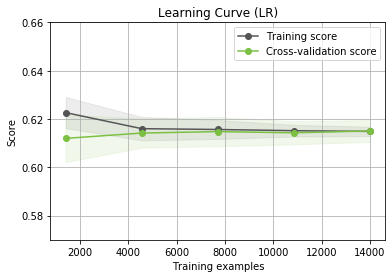

In [11]:

title = "Learning Curve (LR)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, (0.57, .66), cv=cv, n_jobs=4)

plt.show()


In [13]:

title = "Learning Curve (LR)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X1, y1, (0.57, .66), cv=cv, n_jobs=4)

plt.show()


NameError: name 'X1' is not defined

In [14]:

title = "Learning Curve (LR)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X4, y4, (0.57, .66), cv=cv, n_jobs=4)

plt.show()


NameError: name 'X4' is not defined

TypeError: Cannot clone object '<class 'sklearn.tree._classes.DecisionTreeClassifier'>' (type <class 'abc.ABCMeta'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

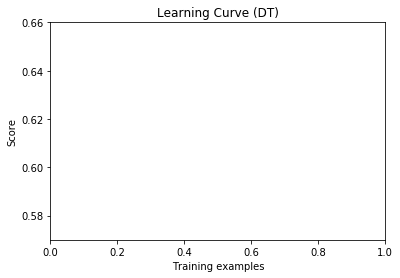

In [24]:
from sklearn.tree import DecisionTreeClassifier
title = "Learning Curve (DT)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = DecisionTreeClassifier
plot_learning_curve(estimator, title, X, y, (0.57, .66), cv=cv, n_jobs=4)

plt.show()
